## Let's learn to train a machine learning algorithm and test it

This notebook will teach you to use one of the popular machine learning package called  <a href="http://scikit-learn.org/stable/"> Scikit Learn</a> to train a simple machine learning algorith to do a classification task.

Take a look at this <a href="http://scikit-learn.org/stable/"> website</a> and different <a href="http://scikit-learn.org/stable/auto_examples/index.html"> examples </a> to explore further.

In this notebook we will look at building machine learning models to predict Pulsar Candidate. The data comes from Rob Lyon at Manchester. This data is publically available. For more information check out https://figshare.com/articles/HTRU2/3080389/1

I encourage you to play around with the code and see what happens !


We will start by loading the necessary libraries to the workspace. 

In [9]:
# You don't want to change anything here now

import numpy as np   # For some numerical stuff
import matplotlib.pyplot as plt # For making beautiful plots
from sklearn.neighbors import KNeighborsClassifier  # A simple machine learning model known as KNN
from sklearn.cross_validation import train_test_split # A utility to split data
from sklearn.metrics import precision_score
%pylab inline

# You may see some messages in the next line, don't worry about them

Populating the interactive namespace from numpy and matplotlib


#### Now lets load the data to our workspace 

* Data is a csv file with each column as features and rows as samples of positive and negative candidates

* Class label is the last column where "1" correspondes to true pulsar candidate and "0" a false candidate

In [2]:
dataset = np.loadtxt('../Data/HTRU_2.csv',delimiter=',') # Load the complete iris data structure to this variable

# Now lets get the features
features = dataset[:,0:-1]

# The class labels
labels = dataset[:,-1]



In [3]:
# Lets have a look at the names of the features and dimensions (shape) of the feature array and also see how many classes are present.
# Verify if the number of feature names are equal to the number of columns

print '\nThe feature array has %d rows and %d columns'%(features.shape[0],features.shape[1])

print '\nThere are %d classes of objects in the dataset'%(len(np.unique(labels)))


The feature array has 17898 rows and 8 columns

There are 2 classes of objects in the dataset


#### Lets plot the data in a two dimensional space with the first feature on the x-axis and second on the y-axis 

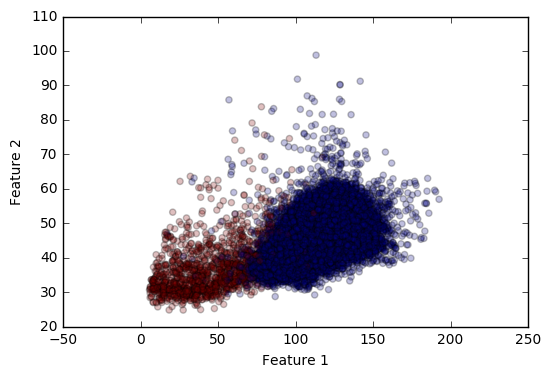

In [15]:
index_1 = 0 # Modify this to change the x-axis . Now it will take the first column. [In python index 1 starts at '0']
index_2 = 1 # Modify this to change the y-axis

plt.scatter(features[:,index_1],features[:,index_2],c=labels,alpha=0.25) # Make the scatter plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

#### Split the data into train and test sample

Generally when training a machine learning algorithm, we have to validate its learning accuracy againts a set of test data whose labels are known. Performing this test will help us evalute how good the algorithm has learned. As a general practise we split our data into training and test samples. Usually 70% of the total data is used for training and the rest 30% for validation.

The following peice of code splits the data into training and test sets.

In [6]:
# train_data --> feature samples for training
# test_data  --> feature samples to evaluate / test
# train_labels --> class labels for the training data
# test_labels --> class labels for the test data

train_data,test_data,train_labels,test_labels = train_test_split(features,labels,test_size=0.3,random_state=0)

In [7]:
# Lets have a look at the size of the train and test data

print 'Train data has %d samples'%(train_data.shape[0])
print 'Test data has %d samples'%(test_data.shape[0])

Train data has 12528 samples
Test data has 5370 samples


#### Training the machine 

In this example we will train a simple machine learning algorithm called K-nearest neighbors to classify the 3 different classes in the data we have loaded.

In [8]:
mymodel = KNeighborsClassifier(n_neighbors=5,)  # Create the classifier object to a variable 'mymodel'

mymodel = mymodel.fit(train_data,train_labels) # Train the algorithm and save the model mymodel 

 That's it ! We have trained our first machine learning algorithm. Now lets test it.


#### Testing the algorithm 

Testing the algorithm is simple as training it. To evaluate the performance we will use an evaluation metric 
called 'Percision Score'. The precision score is defined as

$\mathrm{precision = \frac{Number \ of \ correctly \ classified \ samples}{Number \ of \ correctly \ classified \ samples \ + \ Number \ of \ incorrectly \ classified \ samples}}$

The higher this number better the performance of the machine learning algorithm. This simply means the machine learning algorithm has learnt the pattern well.

In [10]:
# Test the performance of the algorithm on the test data which was generated through the splitting before.

predictions = mymodel.predict(test_data)

# Now we have the class labels predicted by the algorithm for each test samples in the variable 'predictions'



In [11]:
# Time to check the precision score

score = precision_score(predictions,test_labels,average='micro')

print 'The precision score is %f'%(score*100)

The precision score is 97.374302


As an excercise change the values of the following parameters in the above code and check how it affects 
the precision score.

* test_size=0.2 in test_train_split [ Change it values like 0.5, 0.2 etc] 

* "n_neighbours=5" in  clf = KNeighborsClassifier(n_neighbors=5) [Change the value between 1 and 25]  
